In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [220]:
# Import Data
overtime21 = pd.read_csv('./data/2021_Details.xlsx - _2021_Detals.csv')

overtime_court12 = pd.read_excel('./data/Court_Overtime_2012_-_2014.xlsx', '2012')
overtime_court13 = pd.read_excel('./data/Court_Overtime_2012_-_2014.xlsx', '2013')
overtime_court14 = pd.read_excel('./data/Court_Overtime_2012_-_2014.xlsx', '2014')
overtime_court15 = pd.read_excel('./data/Court_Overtime_2015_-_2017.xlsx', '2015')
overtime_court16 = pd.read_excel('./data/Court_Overtime_2015_-_2017.xlsx', '2016')
overtime_court17 = pd.read_excel('./data/Court_Overtime_2015_-_2017.xlsx', '2017')
overtime_court18 = pd.read_excel('./data/Court_Overtime_2018_-_2020.xlsx', '2018')
overtime_court19 = pd.read_excel('./data/Court_Overtime_2018_-_2020.xlsx', '2019')
overtime_court20 = pd.read_excel('./data/Court_Overtime_2018_-_2020.xlsx', '2020')
overtime_court21 = pd.read_excel('./data/Court_Overtime_2021_-_2022_ytd.xlsx', '2021')
overtime_court22 = pd.read_excel('./data/Court_Overtime_2021_-_2022_ytd.xlsx', '2022 ytd')
# Oct 26th is the last date in 2022 data 

overtime_police_record = pd.read_excel('./data/Police_Record_Request_Jan_2019_to_present.xlsx')

earnings21 = pd.read_csv('./data/finalconsolidatedcy22earnings_feb2023.xlsx-sheet1.csv')

In [221]:
overtime_court = pd.concat([overtime_court12, overtime_court13, overtime_court14, 
overtime_court15, overtime_court16, overtime_court17, overtime_court18, overtime_court19, 
overtime_court20, overtime_court21, overtime_court22])

### Overtime and Overtime_court can be merged by Emp.ID and ID

### But earnings data has no ID so matching by name seems like the best way

### I think Rank in overtime data has close relationship with Title.

In [4]:
overtime21.head()

,Tracking_No,Emp. ID,Employee,Rank,Street,xStreet,Detail\nDate,Start\nTime,End \nTime,Hours\nWorked,Hours\nPaid,Type,Customer No.,Customer,Customer Address,Customer Address 1,Customer Address 3,Customer_City,Customer_State,Customer_zip
0,2343189,140298,"GARNEY,BRIAN",9,NEW CHARDON ST,NaN,1/2/2021,700,800,100,4,C,2838,"MORIARTY, JOHN & ASSOC",3 CHURCH STREET,NaN,NaN,WINCHESTER,MA,01890
1,2343190,10264,"GAVA,ROY",9,NEW CHARDON ST,NaN,1/2/2021,700,800,100,4,C,2838,"MORIARTY, JOHN & ASSOC",3 CHURCH STREET,NaN,NaN,WINCHESTER,MA,01890
2,2338683,9707,"BOYLE,FREDERICK J",9,LOMASNEY WY,NaN,1/2/2021,700,1200,500,8,C,2602,TISHMAN CONSTRUCTION CORP,1 FEDERAL ST FL 8,NaN,NaN,BOSTON,MA,02110
3,2340857,116235,"JOSEPH,GREGORY",9,LONGWOOD AV,NaN,1/1/2021,800,1530,730,8,S,151,CHILDREN'S HOSPITAL BOSTON,300 LONGWOOD AVENUE,"ATTN:BOB RYAN,SECURITY DEPT",NaN,BOSTON,MA,02115
4,2343951,12253,"BUTLER,BOBBIE",9,BLUE HILL AV,NaN,1/1/2021,900,1500,600,8,C,396,NATIONAL GRID,40 SYLVAN ROAD,ATTN: MARY MULRONEY,NaN,WALTHAM,MA,02451


In [5]:
overtime_court21.head()

,ID,NAME,RANK,ASSIGNED_DESC,CHARGED_DESC,OTDATE,OTCODE,DESCRIPTION,STARTTIME,ENDTIME,WRKDHRS,OTHOURS
0,153088,"Chen,Steven",Ptl,DISTRICT 01,DISTRICT 01,2021-01-05,281.0,COURT:CLERK MAG. HRG,900,930,0.50,4.0
1,53603,"Gero,Jarrod A",Det,B-2 DETECTIVES,B-2 DETECTIVES,2021-01-06,283.0,COURT:MOTIONS HRG.,1130,1230,1.00,4.0
2,11716,"McCarthy,Peter L",Det,B-3 DETECTIVES,B-3 DETECTIVES,2021-01-04,286.0,COURT:CASE PREP.,1600,1730,1.50,4.0
3,157666,"Mejia,Karen Y",Ptl,DISTRICT 01,DISTRICT 01,2021-01-04,281.0,COURT:CLERK MAG. HRG,900,930,0.50,4.0
4,12045,"Merricks,Kirk D.",Ptl,DISTRICT 01,DISTRICT 01,2021-01-05,281.0,COURT:CLERK MAG. HRG,900,915,0.25,4.0


In [6]:
overtime_police_record.head(10)

,IDNO6,NAME,RANK,ASSIGNED_DESC,CHARGED_DESC,OTDATE,OTCODE,DESCRIPTION,STARTTIME,ENDTIME,WRKDHRS,OTHOURS
0,10525,"Davin,John J",Capt,SPECIAL OPERATIONS DIVISION,TACTICAL OPERATIONS,2019-01-01,271,ENTRY TEAM,130,600,4.5,4.5
1,10273,"Hosein,Haseeb",Capt,DISTRICT 03,DISTRICT 03,2019-01-01,212,CRIME SCENE INVEST.,315,515,2.0,4.0
2,8368,"Terenzi,Phillip",Capt,OPERATIONS DIVISION,OPERATIONS DIVISION,2019-01-01,325,COMPLETE TOUR ASSIGN,1600,1900,3.0,3.0
3,115669,"Auclair,Richard",Civili,LATENT PRINTS UNIT,LATENT PRINTS UNIT,2019-01-01,261,ADD. WORK ASSIGNED,1700,2000,3.0,3.0
4,113177,"Cardona,Veronica",Civili,OPERATIONS DIVISION,OPERATIONS DIVISION,2019-01-01,261,ADD. WORK ASSIGNED,0,400,4.0,4.0
5,80561,"Collins,Dianna",Civili,OPERATIONS DIVISION,OPERATIONS DIVISION,2019-01-01,111,SICK LEAVE,800,1600,8.0,8.0
6,90489,"Correia,Sylvia L",Civili,OPERATIONS DIVISION,OPERATIONS DIVISION,2019-01-01,112,VACATION LEAVE,1600,0,8.0,8.0
7,143367,"Fredericks,Jennifer",Civili,BRIC,INTELLIGENCE GROUP,2019-01-01,261,ADD. WORK ASSIGNED,900,1700,8.0,8.0
8,99560,"Garcia,Jazdiannet",Civili,OPERATIONS DIVISION,OPERATIONS DIVISION,2019-01-01,261,ADD. WORK ASSIGNED,0,400,4.0,4.0
9,75005,"Green,Derek",Civili,BUILDING SECURITY UNIT,OPERATIONS DIVISION,2019-01-01,261,ADD. WORK ASSIGNED,600,1000,4.0,4.0


In [7]:
earnings21.head()

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_ GROSS,POSTAL
0,"Gavin,Donna M.",Boston Police Department,Police Lieutenant (Det),"53,226.90",NaN,"1,045,845.44",463.52,NaN,NaN,"12,812.39","1,112,348.25",02186
1,"Cassellius,Brenda",Superintendent,Superintendent,"179,109.61",NaN,"417,839.83",NaN,NaN,NaN,NaN,"596,949.44",55419
2,"Dempsey,John",Boston Fire Department,Commissioner (BFD),"133,653.78",NaN,"312,752.53",NaN,NaN,NaN,NaN,"446,406.31",02152
3,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),"145,775.26",NaN,"13,932.92","196,515.25",NaN,"11,880.00","29,155.26","397,258.69",02052
4,"Smith,Sean P",Boston Police Department,Police Lieutenant,"142,535.62",NaN,"18,827.45","142,692.38",NaN,"46,365.00","35,633.88","386,054.33",02186


### How do we deal with missing data?

In [8]:
print('overtime21')
print(overtime21.isnull().sum())

print('overtime_court21')
print(overtime_court21.isnull().sum())

print('earnings21')
print(earnings21.isnull().sum())

overtime21
Tracking_No               0
Emp. ID                   0
Employee                  0
Rank                      0
Street                    0
xStreet               52282
Detail\nDate              0
Start\nTime               0
End \nTime                0
Hours\nWorked             0
Hours\nPaid               0
Type                      0
Customer No.              0
Customer                  0
Customer Address          0
Customer Address 1    47931
Customer Address 3    69097
Customer_City             0
Customer_State            0
Customer_zip              2
dtype: int64
overtime_court21
ID               0
NAME             0
RANK             0
ASSIGNED_DESC    0
CHARGED_DESC     0
OTDATE           0
OTCODE           0
DESCRIPTION      0
STARTTIME        0
ENDTIME          0
WRKDHRS          0
OTHOURS          0
dtype: int64
earnings21
NAME                   0
DEPARTMENT_NAME        0
TITLE                  0
REGULAR              600
RETRO              20112
OTHER               73

# OT of Court Appearance

In [213]:
 print(overtime_court.iloc[0]['OTDATE'])

print(overtime_court.iloc[0]['OTDATE'].year)

type(overtime_court.iloc[0]['OTDATE'].year)

#  print(strfttime(overtime_court.iloc[0]['OTDATE']))
#  .years

2012-01-04 00:00:00
2012


int

In [225]:
def get_year(date):
    return(date.year)

overtime_court['year'] = overtime_court['OTDATE'].apply(get_year)


#### Q. How has overtime for court appearances changed year-over-year? 

### Appearnace was decreasing wasovertime since 2012 but after COVID-19 (2020) it is rising year by year.

Text(0.5, 1.0, 'Overtime Court Appearance from 2012 to 2023')

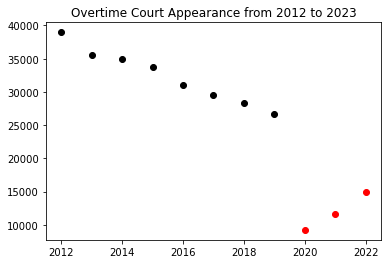

In [234]:
# overtime_court appearance

for i in range(11):
    temp = overtime_court[overtime_court['year']==2012+i]
    if i < 8:
        plt.scatter(2012+i, temp.shape[0], c='black')
    else:
        plt.scatter(2012+i, temp.shape[0], c='red')
    
plt.title('Overtime Court Appearance from 2012 to 2023')

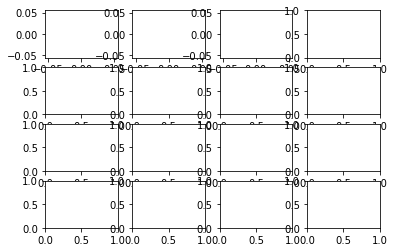

In [238]:
# for i in range(13):

fig, axs = plt.subplots(4, 4)
ind = range(3)
for ax, i in zip(axs.flat, ind):
    temp = overtime_court[overtime_court['OTDATE']==2012+i]
    ax.scatter(temp['WRKDHRS'], temp['OTHOURS'])
    # plt.title(f'Overtime of Court Appearance in {2012+1}')
    # plt.xlabel('Wored Hours')
    # plt.ylabel('Paid Hours')

Text(0.5, 1.0, 'Ratio of Paid Hours to Worked Hours(per case)-Court Overtime 2021')

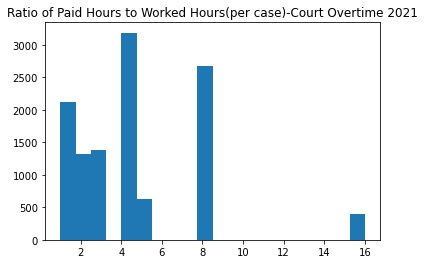

In [165]:
plt.hist(overtime_court21['OTHOURS'] / overtime_court21['WRKDHRS'], bins=20)
# per each case
plt.title('Ratio of Paid Hours to Worked Hours(per case)-Court Overtime 2021')

Index(['ID', 'NAME', 'RANK', 'ASSIGNED_DESC', 'CHARGED_DESC', 'OTDATE',
       'OTCODE', 'DESCRIPTION', 'STARTTIME', 'ENDTIME', 'WRKDHRS', 'OTHOURS'],
      dtype='object')


Text(0.5, 1.0, 'Ratio of Paid Hours to Worked Hours(per employee)-Court Overtime 2021')

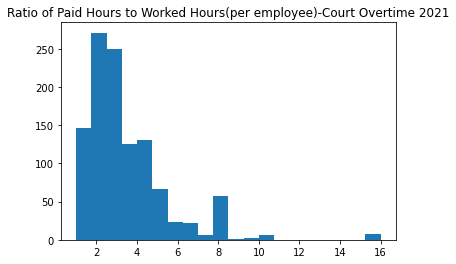

In [170]:
print(overtime_court21.columns)
overtime_court21_personal = overtime_court21.groupby('ID').sum(['WRKEDHRS', 'OTHOURS'])

plt.hist(overtime_court21_personal['OTHOURS'] / overtime_court21_personal['WRKDHRS'], bins=20)
# per employee
plt.title('Ratio of Paid Hours to Worked Hours(per employee)-Court Overtime 2021')

Text(0.5, 1.0, 'Ratio of Paid Hours to Worked Hours(per case)-Court Overtime 2021')

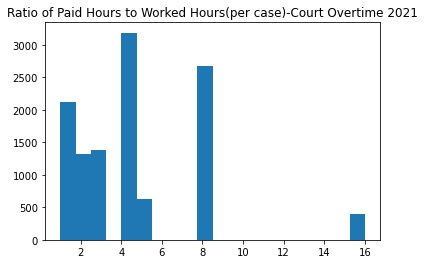

In [169]:
plt.hist(overtime_court21['OTHOURS'] / overtime_court21['WRKDHRS'], bins=20)
# per each case
plt.title('Ratio of Paid Hours to Worked Hours(per case)-Court Overtime 2021')

## Difference between hours worked and hours paid

### TODO

### Any pattern? time of year, location, weekdays/weekends, 



In [117]:
temp_overtime21 = overtime21.copy()
temp_overtime21.sort_values(by=['Emp. ID', 'Detail\nDate'], inplace=True)

temp_overtime21['count'] = temp_overtime21.groupby('Emp. ID').count().iloc[:, 0]

temp_overtime21.columns

Index(['Tracking_No', 'Emp. ID', 'Employee', 'Rank', 'Street', 'xStreet',
       'Detail\nDate', 'Start\nTime', 'End \nTime', 'Hours\nWorked',
       'Hours\nPaid', 'Type', 'Customer No.', 'Customer', 'Customer Address',
       'Customer Address 1', 'Customer Address 3', 'Customer_City',
       'Customer_State', 'Customer_zip', 'count'],
      dtype='object')

### Hours worked and hours paid are ceratinly different

In [119]:
print(temp_overtime21['Hours\nWorked'].unique())
print(sorted(temp_overtime21['Hours\nPaid'].unique()))

[ 615  625  742  725  712  855  700  748  754  715  709  830  900  500
  630  600  100  430  800  730  200   45  530  415  315  230  445  745
  300  400  710  930  655  645  650   30   15  515  130  115  330  635
  647  637  815  345  145  545  720  640  729  817  657  215  915  245
 1000  620  618   20  707  705  755  925  639  627  718  804 1400  425
 1230 1530   55  845  440 1200  540  747 1100  459  420  529  648  520
  455  807  945  750  827  910  610  429 1115  514  724  825 1015  659
 1030  510  509  450 1130  550  220  310   35  505  410  120  759  335
   40  850  735   10  110  525  435  555  150  340  250  518  703  810
  135  210  155]
[4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16]


In [120]:
def workedhr_to_time(num):
    time = pd.to_datetime(num, format='%H%M')
    return time
    
def paidhr_to_time(num):
    time = pd.to_datetime(num, format='%H')
    return time

temp_overtime21['Workedhrs'] = temp_overtime21['Hours\nWorked'].apply(workedhr_to_time)
temp_overtime21['Paidhrs'] = temp_overtime21['Hours\nPaid'].apply(paidhr_to_time)

temp_overtime21['Paid - Worked'] = temp_overtime21['Paidhrs'] - temp_overtime21['Workedhrs'] 

def time_to_int(time):
    return time.seconds / (60 * 60)
    
temp_overtime21['Paid - Worked'] = temp_overtime21['Paid - Worked'].apply(time_to_int)


Text(0.5, 1.0, 'Paid - Wored Hours: Number of Records')

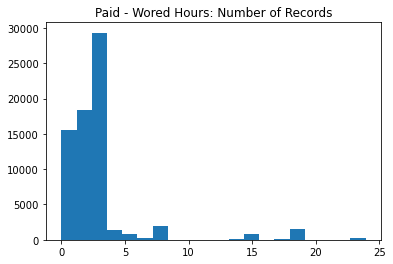

In [136]:
plt.hist(temp_overtime21['Paid - Worked'], bins=20)
plt.title('Paid - Wored Hours: Number of Records')

Text(0.5, 1.0, 'Sum of Paid - Wored Hours by Employee ID')

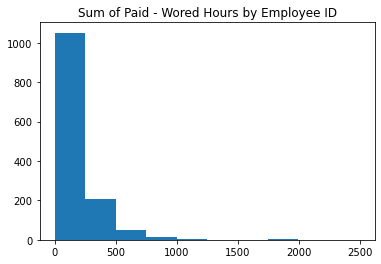

In [147]:
sum_timediff = temp_overtime21.groupby(['Emp. ID']).sum(['Paid - Worked'])
plt.hist(sum_timediff['Paid - Worked'], bins=10)
plt.title('Sum of Paid - Wored Hours by Employee ID')

In [150]:
sum_timediff.columns

Index(['Tracking_No', 'Rank', 'Start\nTime', 'End \nTime', 'Hours\nWorked',
       'Hours\nPaid', 'Customer No.', 'count', 'Paid - Worked'],
      dtype='object')

In [152]:
timediff_list = [100, 250, 500, 1000]

for i in timediff_list:
    total_cnt = sum_timediff.shape[0]
    temp = sum_timediff[sum_timediff['Paid - Worked']>=i]
    ovetime_cnt = temp.shape[0]
    print(f"{ovetime_cnt} Employees have {i}+ hours of Paid - Worked hours is {round(ovetime_cnt / total_cnt * 100, 2)}%")

598 Employees have 100+ hours of Paid - Worked hours is 44.83%
283 Employees have 250+ hours of Paid - Worked hours is 21.21%
77 Employees have 500+ hours of Paid - Worked hours is 5.77%
9 Employees have 1000+ hours of Paid - Worked hours is 0.67%


## Check overtime pay dist
### 'str' and 'float' was mixed in 'OVERTIME'

### TOO many titles... 

In [73]:
print(set(temp_earnings21['TITLE']))
print(f"{len(set(temp_earnings21['TITLE']))} titles")

{'FF (FPD InspLev2Certification)', 'Chief of Staff', 'Sen Technician 33', 'Police Lieutenant', 'DepFireChiefAdmn-AdvTechnician', 'Construction&DesignServMangr', 'Lieut-Hackney Carriage Inves.', 'Specialist (BTU) non ac', 'Librarian', 'BPS Bi-Wkly 26 Leave non-ac', 'Driver', 'Asst Keeper Of Prints', 'Corporation Counsel', 'HMIS Administrator', 'Collection Agent(Bpd)', 'Confidential Secretary (Fcm)', 'Dir of Personal Property', 'Aquatics Manager', 'Hvy Mtr Equi Repairpr Class II', 'Director of Human Resources', 'Principal Middle', 'Prin Account Clerk 25', 'Social Worker (BPD)', 'Sen Technician (C)', 'Dir-Public Info (Police)', 'Police Sergeant/AcadInstructor', 'Financial Analyst', 'Safety Inspector (C Fleet Mn)', 'Jr Eng Aid', 'Police Sergeant', 'Library Aide', 'Police Officer', 'Spprtng Indgnous Comm Fellow', 'Carpenter', 'Chief Of Staff', 'Sr Data Proc Sys Anl (BTD)', 'Sr. Graphic Designer', 'Supv-Parking Enforcement', 'Digital Director', 'Dir, BosRegIntelCntr (Red-Cir)', 'Sr Budget An

## Check overtime frequency by person

### 1 row per 1 overtime record

In [74]:
print(f"{len(temp_overtime21['Emp. ID'].unique())} employees submitted {temp_overtime21.shape[0]} overtime requests")

1334 employees submitted 70487 overtime requests


Text(0.5, 1.0, 'Dist of overtime frequency')

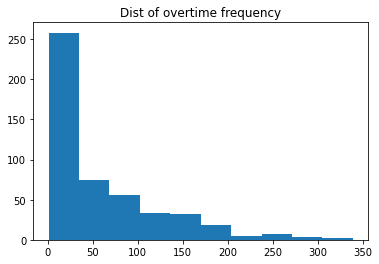

In [75]:
temp_overtime21['OVERTIME_FREQ'] = temp_overtime21.groupby(['Emp. ID'])['Emp. ID'].count()
plt.hist(temp_overtime21['OVERTIME_FREQ'])
plt.title('Dist of overtime frequency')

In [76]:
overtime_freq_list = [25, 50, 100, 150, 200]

for i in overtime_freq_list:
    total_cnt = len(temp_overtime21['Emp. ID'].unique())
    temp = temp_overtime21[temp_overtime21['OVERTIME_FREQ']>=i]
    ovetime_cnt = len(temp['Emp. ID'].unique())
    print(f"Employees with {i}+ overtime request is {round(ovetime_cnt / total_cnt * 100, 2)}%")

Employees with 25+ overtime request is 15.52%
Employees with 50+ overtime request is 11.24%
Employees with 100+ overtime request is 7.05%
Employees with 150+ overtime request is 3.75%
Employees with 200+ overtime request is 1.35%


## Overtime request frequency by rank 
#### pretty meaningless

(array([1., 3., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 10. ,  23.1,  36.2,  49.3,  62.4,  75.5,  88.6, 101.7, 114.8,
        127.9, 141. ]),
 <BarContainer object of 10 artists>)

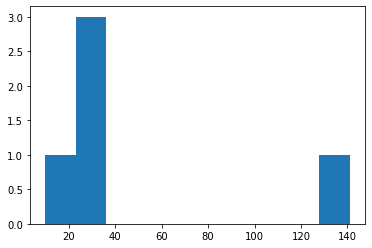

In [16]:
plt.hist(overtime21[overtime21['Rank']==3]['OVERTIME_FREQ'])

### Rank==4 data isn't working

(array([3., 3., 0., 2., 0., 0., 0., 0., 0., 1.]),
 array([  1. ,  16.3,  31.6,  46.9,  62.2,  77.5,  92.8, 108.1, 123.4,
        138.7, 154. ]),
 <BarContainer object of 10 artists>)

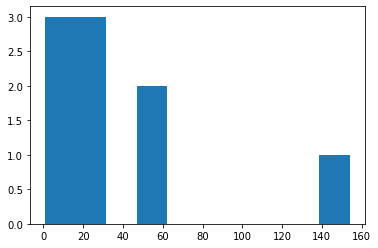

In [17]:
plt.hist(overtime21[overtime21['Rank']==5]['OVERTIME_FREQ'])

(array([3., 2., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([  1. ,  15.8,  30.6,  45.4,  60.2,  75. ,  89.8, 104.6, 119.4,
        134.2, 149. ]),
 <BarContainer object of 10 artists>)

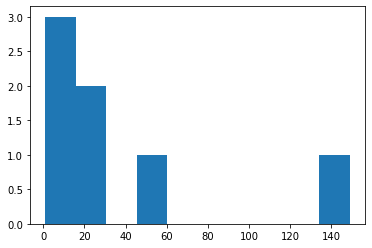

In [18]:
plt.hist(overtime21[overtime21['Rank']==6]['OVERTIME_FREQ'])

(array([12.,  6.,  2.,  1.,  1.,  1.,  2.,  1.,  2.,  2.]),
 array([  1. ,  22.4,  43.8,  65.2,  86.6, 108. , 129.4, 150.8, 172.2,
        193.6, 215. ]),
 <BarContainer object of 10 artists>)

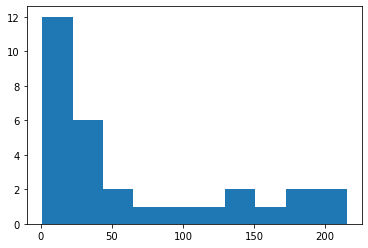

In [19]:
plt.hist(overtime21[overtime21['Rank']==7]['OVERTIME_FREQ'])

(array([12.,  4.,  1.,  2.,  4.,  0.,  1.,  0.,  2.,  2.]),
 array([  1.,  20.,  39.,  58.,  77.,  96., 115., 134., 153., 172., 191.]),
 <BarContainer object of 10 artists>)

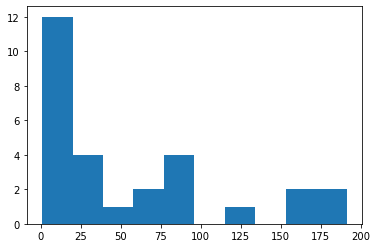

In [20]:
plt.hist(overtime21[overtime21['Rank']==8]['OVERTIME_FREQ'])

(array([212.,  64.,  49.,  29.,  26.,  14.,   3.,   7.,   3.,   2.]),
 array([  1. ,  34.8,  68.6, 102.4, 136.2, 170. , 203.8, 237.6, 271.4,
        305.2, 339. ]),
 <BarContainer object of 10 artists>)

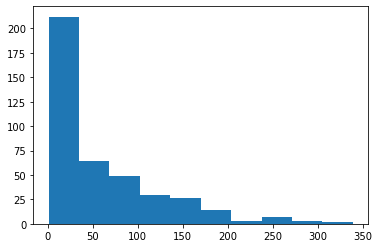

In [21]:
plt.hist(overtime21[overtime21['Rank']==9]['OVERTIME_FREQ'])

### What is overtime code(OTCODE) & OTHOURS?
### Relationship between OTHOURS and WRKDHRS?

In [80]:
print(overtime_court21.columns)

print(overtime_court21.loc[:5, ['ID', 'NAME', 'RANK', 'ASSIGNED_DESC', 'CHARGED_DESC', 'OTDATE',
       'OTCODE', 'DESCRIPTION', 'STARTTIME', 'ENDTIME', 'WRKDHRS', 'OTHOURS']])

print(type(overtime_court21['STARTTIME'][0]))

print(type(overtime_court21['WRKDHRS'][0]))

print(type(overtime_court21['OTHOURS'][0]))

Index(['ID', 'NAME', 'RANK', 'ASSIGNED_DESC', 'CHARGED_DESC', 'OTDATE',
       'OTCODE', 'DESCRIPTION', 'STARTTIME', 'ENDTIME', 'WRKDHRS', 'OTHOURS'],
      dtype='object')
       ID                NAME RANK     ASSIGNED_DESC      CHARGED_DESC  \
0  153088         Chen,Steven  Ptl       DISTRICT 01       DISTRICT 01   
1   53603       Gero,Jarrod A  Det  B-2   DETECTIVES  B-2   DETECTIVES   
2   11716    McCarthy,Peter L  Det  B-3   DETECTIVES  B-3   DETECTIVES   
3  157666       Mejia,Karen Y  Ptl       DISTRICT 01       DISTRICT 01   
4   12045    Merricks,Kirk D.  Ptl       DISTRICT 01       DISTRICT 01   
5   11436  Montesino,Miguel E  Det  A-7   DETECTIVES  A-7   DETECTIVES   

      OTDATE  OTCODE           DESCRIPTION  STARTTIME  ENDTIME  WRKDHRS  \
0 2021-01-05   281.0  COURT:CLERK MAG. HRG        900      930     0.50   
1 2021-01-06   283.0    COURT:MOTIONS HRG.       1130     1230     1.00   
2 2021-01-04   286.0      COURT:CASE PREP.       1600     1730     1.50   
3 2021-0

In [25]:
print(overtime_police_record.head())

    IDNO6              NAME    RANK                ASSIGNED_DESC  \
0   10525      Davin,John J    Capt  SPECIAL OPERATIONS DIVISION   
1   10273     Hosein,Haseeb    Capt                  DISTRICT 03   
2    8368   Terenzi,Phillip    Capt          OPERATIONS DIVISION   
3  115669   Auclair,Richard  Civili           LATENT PRINTS UNIT   
4  113177  Cardona,Veronica  Civili          OPERATIONS DIVISION   

          CHARGED_DESC     OTDATE  OTCODE           DESCRIPTION  STARTTIME  \
0  TACTICAL OPERATIONS 2019-01-01     271            ENTRY TEAM        130   
1          DISTRICT 03 2019-01-01     212   CRIME SCENE INVEST.        315   
2  OPERATIONS DIVISION 2019-01-01     325  COMPLETE TOUR ASSIGN       1600   
3   LATENT PRINTS UNIT 2019-01-01     261    ADD. WORK ASSIGNED       1700   
4  OPERATIONS DIVISION 2019-01-01     261    ADD. WORK ASSIGNED          0   

   ENDTIME  WRKDHRS  OTHOURS  
0      600      4.5      4.5  
1      515      2.0      4.0  
2     1900      3.0      3.0 

# Earnings data

Text(0.5, 1.0, 'Dist of overtime pay')

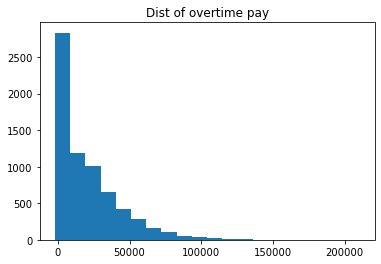

In [63]:
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 

temp_earnings21 = earnings21.copy()

def to_num(x):
    if isinstance(x, str):
        return float(x.replace(',', ''))
    else: 
        return x

temp_earnings21['OVERTIME_int'] = temp_earnings21['OVERTIME'].apply(to_num)

plt.hist(temp_earnings21['OVERTIME_int'], bins=20)
plt.title('Dist of overtime pay')

Num of 0 is 0
Num of 0 is 16392 out of 23204


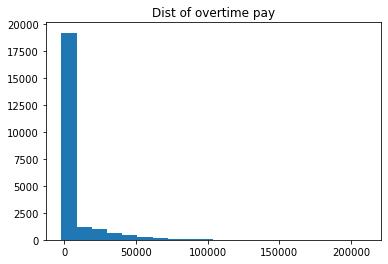

In [64]:
print('Num of 0 is', temp_earnings21[temp_earnings21['OVERTIME_int']==0].shape[0])

temp_earnings21.loc[temp_earnings21['OVERTIME_int'].isna(), 'OVERTIME_int'] = 0

print(f'Num of 0 is', temp_earnings21[temp_earnings21['OVERTIME_int']==0].shape[0], f'out of {temp_earnings21.shape[0]}')

plt.hist(temp_earnings21['OVERTIME_int'], bins=20)
plt.title('Dist of overtime pay')

plt.show()

In [68]:
overtime_list = [5*10**3, 1*10**4, 2.5*10**4, 5*10**4, 1*10**5]

for i in overtime_list:
    total_cnt = temp_earnings21.shape[0]
    ovetime_cnt = temp_earnings21[temp_earnings21['OVERTIME_int']>=i].shape[0]
    print(f"Overtime pay of ${i}+ is {round(ovetime_cnt / total_cnt * 100, 2)}%")

Overtime pay of $5000+ is 19.76%
Overtime pay of $10000+ is 16.35%
Overtime pay of $25000.0+ is 9.41%
Overtime pay of $50000+ is 3.23%
Overtime pay of $100000+ is 0.31%
